## Introduction to Matplotlib


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

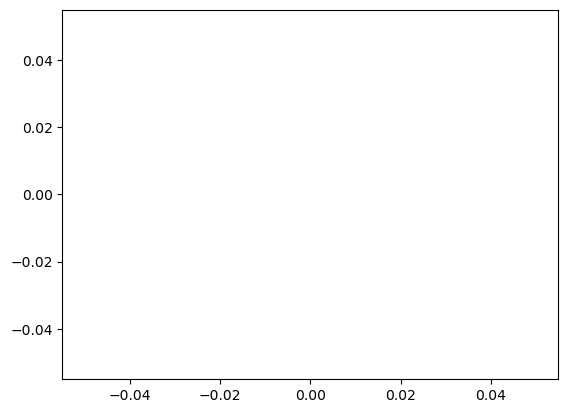

In [22]:
plt.plot()

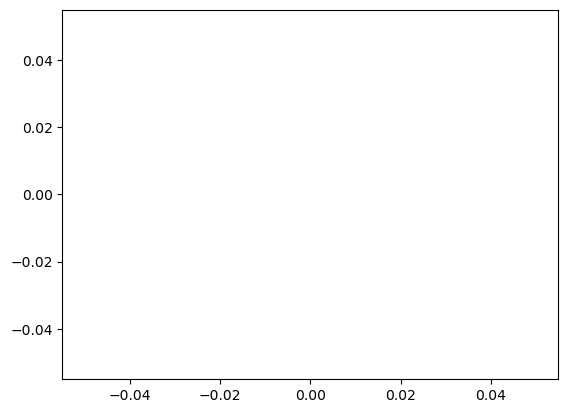

In [23]:
plt.plot();

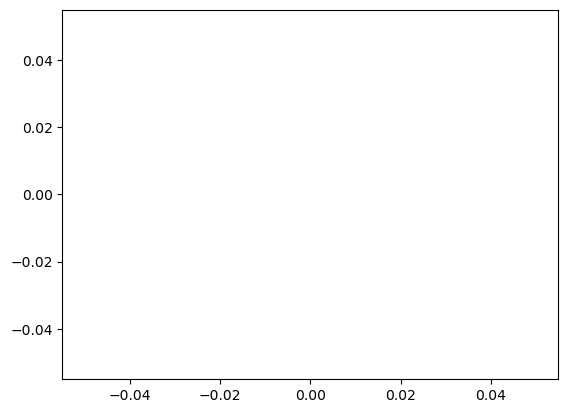

In [24]:
plt.plot()
plt.show()

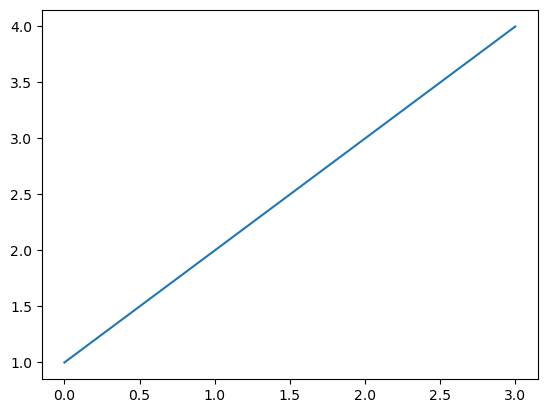

In [25]:
plt.plot([1, 2, 3, 4])

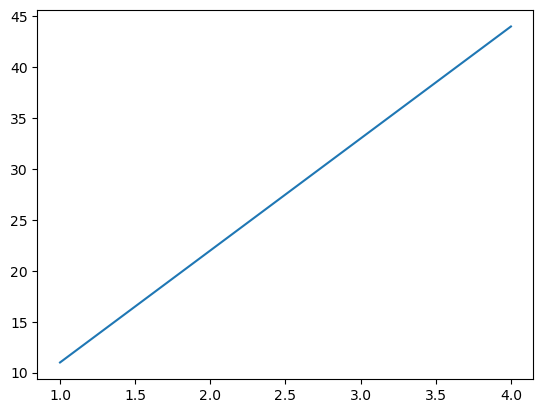

In [26]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)

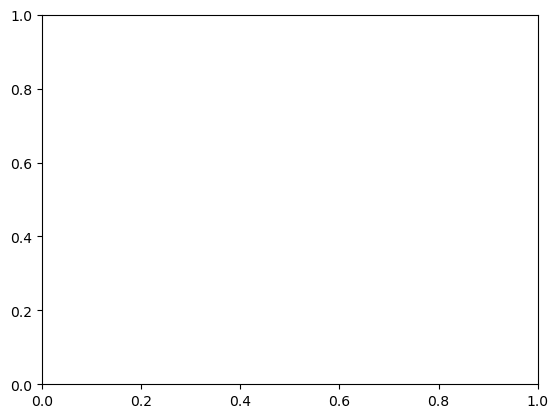

In [27]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

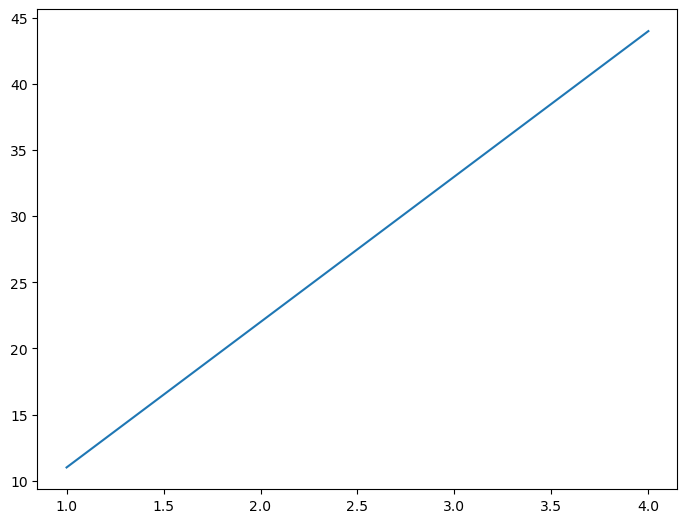

In [28]:
# 2nd method
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

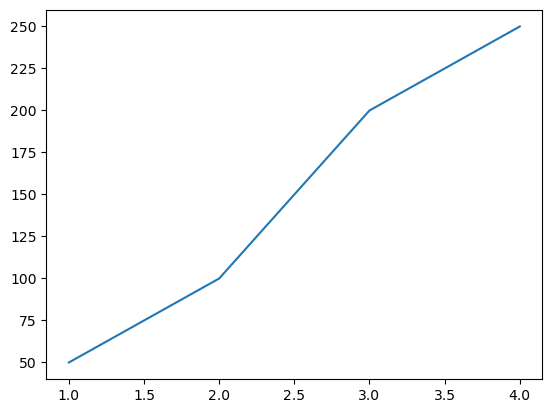

In [30]:
# 3rd method ( recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

![matplotlib](matplotlib-anatomy-of-a-plot.png "Matplotlib")

## Matplotlib example workflow

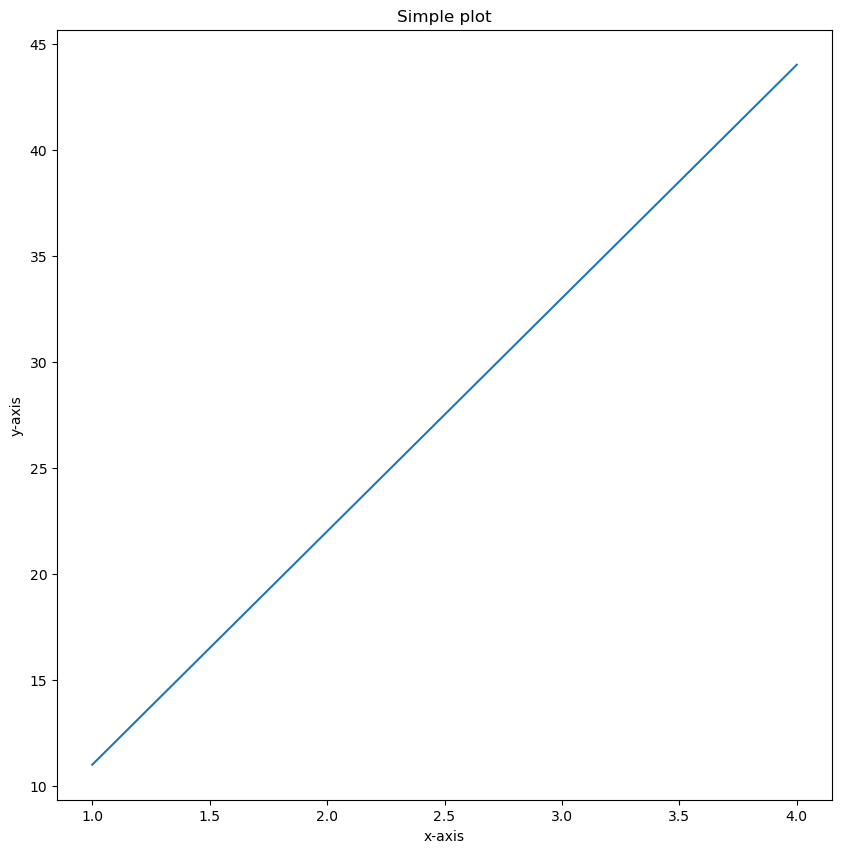

In [34]:
# 0. import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. prepare data
x = [1, 2, 3, 4]
y = [11, 22 ,33 ,44]

# 2. setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width , height)

# 3. plot data
ax.plot(x, y)

# 4. customize plot
ax.set(title="Simple plot",
    xlabel = "x-axis",
    ylabel = "y-axis")

# 5. save & show ( you save the whole figure)
fig.savefig("sample-plot.png")

## Making figures with NumPy arrays

In [35]:
import numpy as np


In [37]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

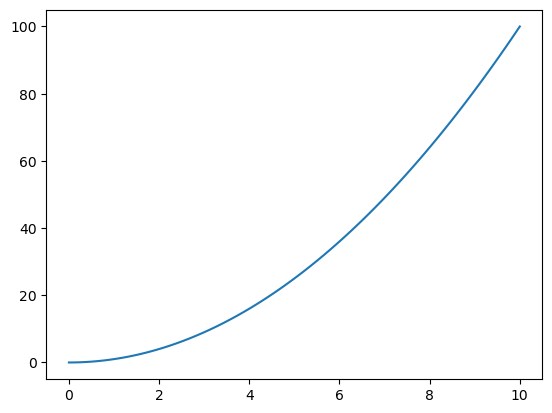

In [38]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

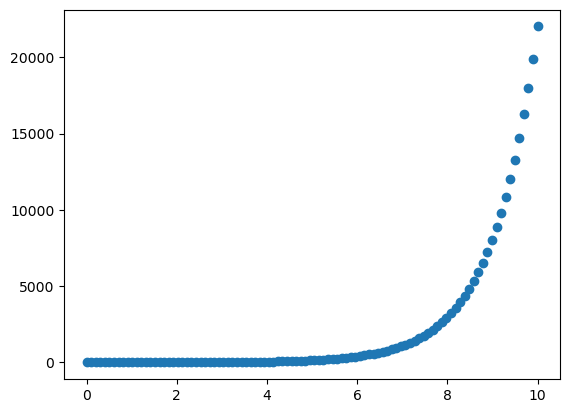

In [39]:
# Use the same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

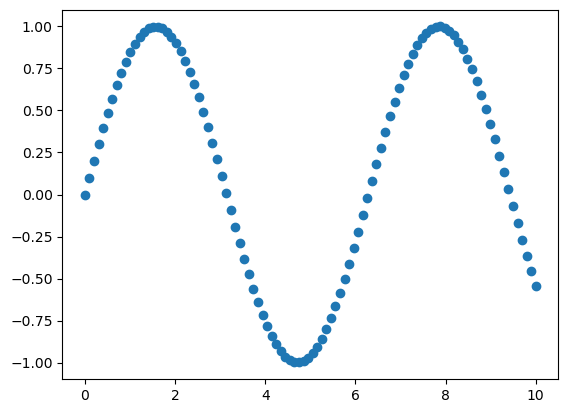

In [40]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

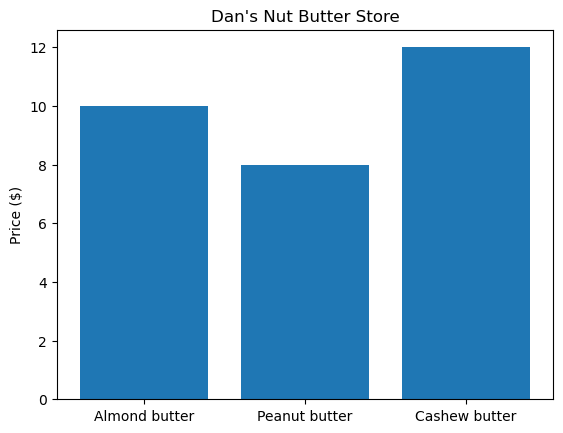

In [45]:
# Make a plot from dictionary
nut_butter_prices =  {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
    ylabel="Price ($)");
